In [1]:
import pandas as pd
import numpy as np

In [22]:
feature=['user_id','item_id','rating','timestamp']
ratings=pd.read_csv('u.data',sep='\t',names=feature)

In [23]:
review.head()

,user_id,item_id,title,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [24]:
df=pd.read_csv('Movie_Id_Titles')

In [25]:
df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [26]:
movies=pd.merge(ratings,df,on='item_id')

In [27]:
movies.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [40]:
movies.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [42]:
rating_updated=pd.DataFrame(movies.groupby('title')['rating'].mean())

In [43]:
rating_updated.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [106]:
rating_updated['No. people rated']=pd.DataFrame(movies.groupby('title')['rating'].count())

In [109]:
rating_updated.head()

,rating,No. people rated
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

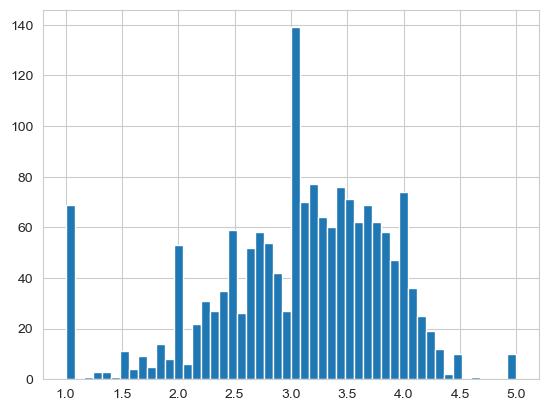

In [54]:
sns.set_style('whitegrid')
rating_updated['rating'].hist(bins=50)

<AxesSubplot:>

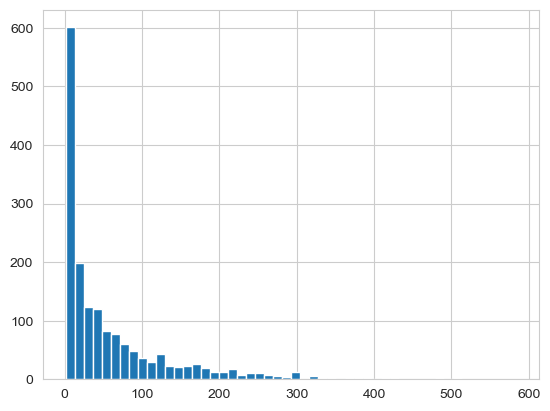

In [110]:
rating_updated['No. people rated'].hist(bins=50)

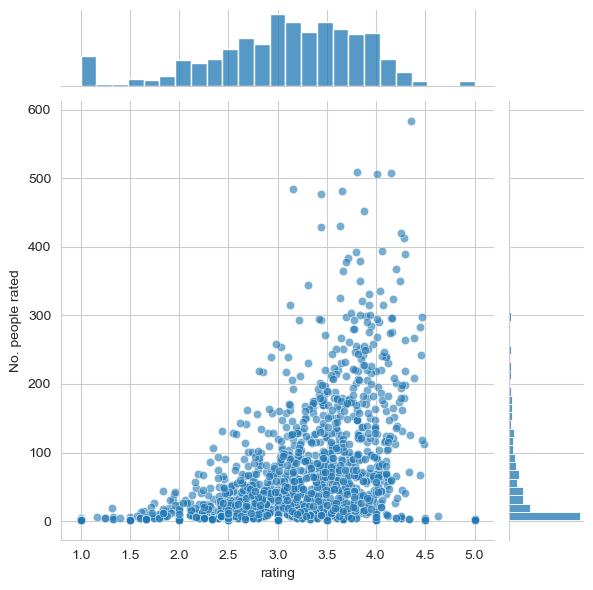

In [111]:
sns.jointplot(x='rating',y='No. people rated',data=rating_updated,alpha=0.6)

In [61]:
moviesMat=movies.pivot_table(index='user_id',columns='title',values='rating')

In [64]:
moviesMat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
rating_updated.sort_values('No. people rated',ascending=False).head(10)

,rating,No. people rated
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [113]:
#Recommending Movies
Star_Wars_rating=moviesMat['Star Wars (1977)']
Toy_Story_rating=moviesMat['Toy Story (1995)']

In [157]:
similar_to_StarWars=moviesMat.corrwith(Star_Wars_rating)
similar_to_ToyStory=moviesMat.corrwith(Toy_Story_rating)

C:\Users\gauta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\gauta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\gauta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\gauta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [115]:
Suggestion_StarWar=pd.DataFrame(similar_to_StarWars,columns=['Correlation'])
Suggestion_StarWar.dropna(inplace=True)

In [116]:
Suggestion_StarWar.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [117]:
Suggestion_StarWar=Suggestion_StarWar.join(rating_updated['No. people rated'])

In [118]:
Suggestion_StarWar.head()

,Correlation,No. people rated
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [153]:
Suggested_Movies=list(Suggestion_StarWar[Suggestion_StarWar['No. people rated']>=100].sort_values('Correlation',ascending=False).head().index)

In [175]:
print('Suggestions Base on Star Wars:\n\n',Suggested_Movies[1:])

Suggestions Base on Star Wars:

 ['Empire Strikes Back, The (1980)', 'Return of the Jedi (1983)', 'Raiders of the Lost Ark (1981)', 'Austin Powers: International Man of Mystery (1997)']


In [172]:
suggestion_Toystory=pd.DataFrame(similar_to_ToyStory,columns=['Correlation'])

suggestion_Toystory.dropna(inplace=True)

suggestion_Toystory=suggestion_Toystory.join(rating_updated['No. people rated'])

print(suggestion_Toystory[suggestion_Toystory['No. people rated']>100].sort_values('Correlation',ascending=False).head())

                               Correlation  No. people rated
title                                                       
Toy Story (1995)                  1.000000               452
Craft, The (1996)                 0.549100               104
Down Periscope (1996)             0.457995               101
Miracle on 34th Street (1994)     0.456291               101
G.I. Jane (1997)                  0.454756               175
